# Medical Cost Predictions

Thank you for stopping by! This is my first project from scratch with no insight or input from course instructors so any feedback would be greatly appreciated to help me continue to expand my knowledge! I would also appreciate any insight on where everyone's go-to sources are to research algorithms and python code.

## Background

The United States spends significantly more money on healthcare than any other country around the world.  Spending is expected to continue to grow with The Centers for Medicare and Medicaid Services (CMS) projecting that by 2028, costs will climb to $6.2 trillion, or about $18,000 per person, and will represent about 20 percent of GDP. With an aging population and actual costs of services expected to increase as well it will be of great value for insurance companies, healthcare companies and patients to have an idea of where their future costs may be.  

## Problem

We will be looking to answer the following question through prediction modeling: **What will a patient's future healthcare costs look like?**

## About the Data

The data we will be using for this project is an open-source data source from Kaggle regarding insurance costs.

To begin we will:

* Import our dataset
* Create our dataset into a dataframe

In [254]:
import sys
print(sys.version)

3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]


In [255]:
import numpy as np #for dealing with arrays
import pandas as pd #for dealing with dataframes
import matplotlib.pyplot as plt #for visualization with matplotlib
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
%matplotlib inline
import seaborn as sns #for visualization with seaborn
from scipy import stats #for descriptive statistics such as pearson coef
import itertools
from sklearn import preprocessing


print('libraries imported')

libraries imported


In [256]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Cleaning/Wrangling

First I will check for missing data values:

Here I will:

* Verify if any missing values
* Verify if any duplicates
* Verify format of the data and reformat if necessary
* Normalize the data if necessary
* Perform binning of the data if necessary
* Turn categorical variables into quantitative variables

In [257]:
#any missing values?
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 85)
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [258]:
duplicate = df[df.duplicated()]
duplicate.count()

age         1
sex         1
bmi         1
children    1
smoker      1
region      1
charges     1
dtype: int64

In [259]:
dup = df.drop_duplicates(keep="first", inplace = True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [260]:
duplicates2 = df[df.duplicated()]
verify_duplicates = len(duplicates2)
verify_duplicates

0

This confirms there are no missing values and we dropped the duplicate rows, now I will verify the types of data in the dataframe:

In [261]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [262]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


The dataframe looks good - we are ready to start!

## Exploratory Data Analysis

Here I will look at:

* Implementing descriptive statistics
* Group data as necessary
* Eliminate outliers if necessary
* Look at data correlations

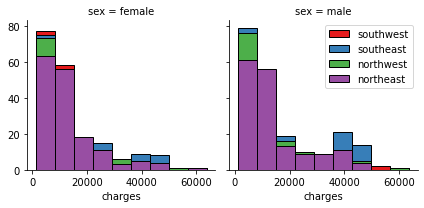

In [263]:
bins = np.linspace(df.charges.min(), df.charges.max(), 10)
g = sns.FacetGrid(df, col="sex", hue="region", palette="Set1", col_wrap=2)
g.map(plt.hist, 'charges', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

From this we can see that the Southeast and Northeast have higher costs in both males and females 

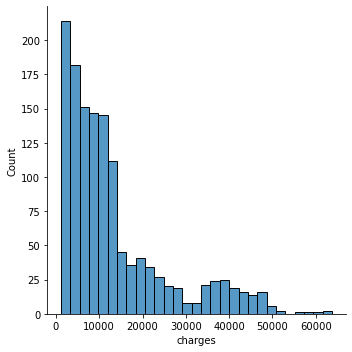

In [264]:
sns.displot(df["charges"])

In [265]:
df["charges"].median()

9386.1613

Now lets take a look at age

In [266]:
a1 = df['age']  
a1.describe()

count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age', ylabel='Count'>

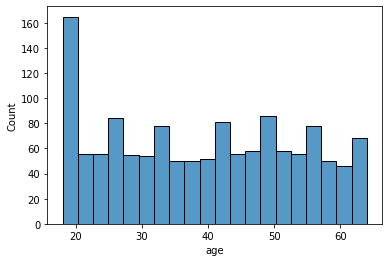

In [267]:
sns.histplot(df['age'], bins=20)

and finally number of children

<AxesSubplot:xlabel='children', ylabel='Count'>

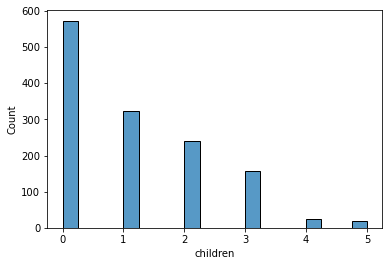

In [268]:
sns.histplot(df['children'], bins=20)

Now lets take a look at outliers in these two charges and age

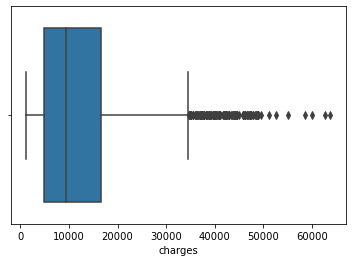

In [269]:
sns.boxplot(x=df["charges"])
plt.show()

In [270]:
df["charges"].median()

9386.1613

In [271]:
# The interquartile range is the difference between the 75th percentile and the 25th percentile.
q1 = df['charges'].quantile(0.25)
q3 = df['charges'].quantile(0.75)
iqr = q3 - q1
print('iqr value is: ',iqr)

iqr value is:  11911.37345


In [272]:
#find upper and lower limits
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

print('lower bounds: ' + str(lower_limit))
print('upper bounds: ' + str(upper_limit))

lower bounds: -13120.716174999998
upper bounds: 34524.777625


In [273]:
#find amount of outliers in charges
cols = ['charges']
((df[cols] < (q1 - 1.5 * iqr)) |(df[cols] > (q3 + 1.5 * iqr))).sum()

charges    139
dtype: int64

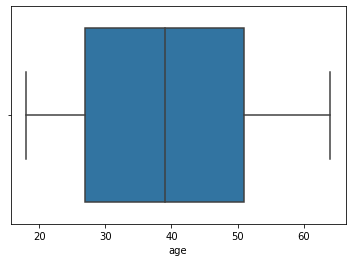

In [274]:
sns.boxplot(x=df["age"])
plt.show()

In [275]:
# The interquartile range is the difference between the 75th percentile and the 25th percentile.
q1a = df['age'].quantile(0.25)
q3a = df['age'].quantile(0.75)
iqr = q3a - q1a

#find upper and lower limits
lower_limit = q1a - 1.5 * iqr
upper_limit = q3a + 1.5 * iqr

#find amount of outliers in charges
cols = ['age']
((df[cols] < (q1a - 1.5 * iqr)) |(df[cols] > (q3a + 1.5 * iqr))).sum()

age    0
dtype: int64

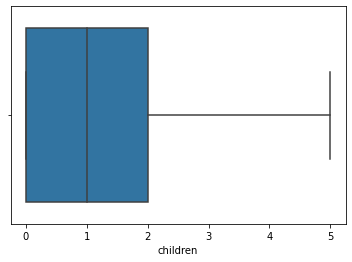

In [276]:
sns.boxplot(x=df["children"])
plt.show()

In [277]:
#find iqr
q1b = df['children'].quantile(0.25)
q3b = df['children'].quantile(0.75)
iqr = q3b - q1b

#find upper and lower limits
lower_limit = q1b - 1.5 * iqr
upper_limit = q3b + 1.5 * iqr

#find amount of outliers in charges
cols = ['children']
((df[cols] < (q1b - 1.5 * iqr)) |(df[cols] > (q3b + 1.5 * iqr))).sum()

children    0
dtype: int64

Therefore we only have outliers in the charges column - 139 of them, and we will drop those outliers

In [278]:
cols = ['charges'] 


df_new = df[~((df[cols] < (q1 - 1.5 * iqr)) |(df[cols] > (q3 + 1.5 * iqr))).any(axis=1)]
df_new.head()

,age,sex,bmi,children,smoker,region,charges
6,46,female,33.44,1,no,southeast,8240.5896
7,37,female,27.74,3,no,northwest,7281.5056
8,37,male,29.83,2,no,northeast,6406.4107
13,56,female,39.82,0,no,southeast,11090.7178
16,52,female,30.78,1,no,northeast,10797.3362


In [279]:
df_new["charges"].median()

9386.1613

### Now lets work on finding correlations

In [280]:
df_new.corr()

,age,bmi,children,charges
age,1.000000,0.181996,-0.286646,0.569416
bmi,0.181996,1.000000,-0.006908,0.003229
children,-0.286646,-0.006908,1.000000,-0.181423
charges,0.569416,0.003229,-0.181423,1.000000


Slight correlations between age and charges and bmi and charges but none of the correlations give us anything really definitive, so lets take a look at Pearson Coefficients

p-value is < 0.001: we say there is strong evidence that the correlation is significant. \
p-value is < 0.05: there is moderate evidence that the correlation is significant. \
p-value is < 0.1: there is weak evidence that the correlation is significant. \
p-value is > 0.1: there is no evidence that the correlation is significant.

In [281]:
pearson_coef, p_value = stats.pearsonr(df_new['age'], df_new['charges'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5694160243387112  with a P-value of P = 9.330179831384192e-59


In [282]:
earson_coef, p_value = stats.pearsonr(df_new['bmi'], df_new['charges'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5694160243387112  with a P-value of P = 0.933563201385653


In [283]:
earson_coef, p_value = stats.pearsonr(df_new['children'], df_new['charges'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5694160243387112  with a P-value of P = 2.3241392877118437e-06


(0.0, 66902.8557155)

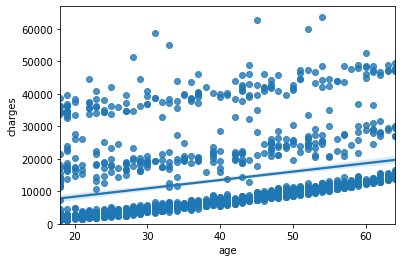

In [284]:
# Age as potential predictor variable of cost
sns.regplot(x="age", y="charges", data=df)
plt.ylim(0,)

(0.0, 66902.8557155)

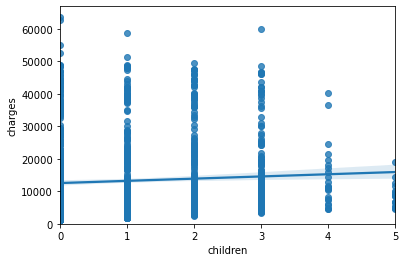

In [285]:
# Children as potential predictor variable of cost
sns.regplot(x="children", y="charges", data=df)
plt.ylim(0,)

(0.0, 66902.8557155)

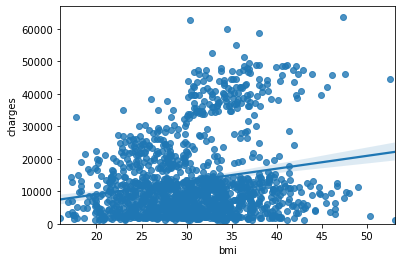

In [286]:
# BMI as potential predictor variable of cost
sns.regplot(x="bmi", y="charges", data=df)
plt.ylim(0,)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

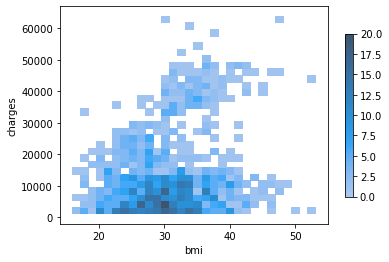

In [287]:
df1=pd.DataFrame(df, columns=["bmi","charges"])
df1
sns.histplot(
    df1, x="bmi", y="charges",
    bins=30, discrete=(False), log_scale=(False),
    cbar=True, cbar_kws=dict(shrink=.75),
)

<AxesSubplot:xlabel='children', ylabel='charges'>

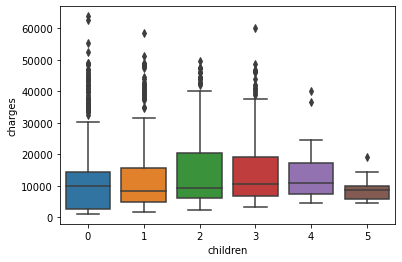

In [288]:
sns.boxplot(x="children", y="charges", data=df)

In [289]:
#group by region
df_group_one = df[['region','charges']]
df_group_one = df_group_one.groupby(['region'],as_index=False).mean()
df_group_one

,region,charges
0,northeast,13406.384516
1,northwest,12450.840844
2,southeast,14735.411438
3,southwest,12346.937377


In [290]:
#group by smoker or non-smoker
df_group_two = df[['smoker','charges']]
df_group_two = df_group_two.groupby(['smoker'],as_index=False).mean()
df_group_two

,smoker,charges
0,no,8440.660307
1,yes,32050.231832


In [291]:
df_group_three = df[['sex','charges']]
df_group_three = df_group_three.groupby(['sex'],as_index=False).mean()
df_group_three

,sex,charges
0,female,12569.578844
1,male,13974.998864


Next Let's take a look at ANOVA:

**ANOVA**: Analysis of Variance
The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

**F-test score**: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. *A larger score means there is a larger difference between the means*.

**P-value**: P-value tells how statistically significant is our calculated score value.

If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.

In [292]:
df_group_one=df[['region', 'charges']].groupby(['region'])
f_val, p_val = stats.f_oneway(df_group_one.get_group('northeast')['charges'], df_group_one.get_group('northwest')['charges'], df_group_one.get_group('southeast')['charges'], df_group_one.get_group('southwest')['charges'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 2.926139903662776 , P = 0.03276288025444947


In [293]:
df_group_two=df[['smoker', 'charges']].groupby(['smoker'])
f_val, p_val = stats.f_oneway(df_group_two.get_group('yes')['charges'], df_group_two.get_group('no')['charges'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 2175.7368631272116 , P = 1.4067220949358597e-282


In [294]:
df_group_three=df[['sex', 'charges']].groupby(['sex'])
f_val, p_val = stats.f_oneway(df_group_three.get_group('female')['charges'], df_group_three.get_group('male')['charges'])
 
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 4.513038425520686 , P = 0.033820791995078286


From all that we have gathered it appears the most important variables will be:

* Age
* Region
* Smoker Status
* BMI

In [295]:
#normalize the data - convert the categorical variables to something we can visualize
df['sex'].replace(to_replace=['male','female'], value=[0,1],inplace=True)


In [296]:
df['region'].replace(to_replace=['southeast','northeast','southwest','northwest'], value=[0,1,2,3],inplace=True)

In [297]:
df['smoker'].replace(to_replace=['yes','no'], value=[0,1],inplace=True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,2,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [298]:
#pick our features
Feature = df[['age','region','smoker']]
X = Feature
X[0:5]

,age,region,smoker
0,19,2,0
1,18,0,1
2,28,0,1
3,33,3,1
4,32,3,1


In [299]:
y = df['charges'].values
y[0:5]

array([16884.924  ,  1725.5523 ,  4449.462  , 21984.47061,  3866.8552 ])

In [300]:
#normalize the data
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.44041773,  0.48180615, -1.96966039],
       [-1.51164747, -1.28790489,  0.50770174],
       [-0.79935006, -1.28790489,  0.50770174],
       [-0.44320136,  1.36666167,  0.50770174],
       [-0.5144311 ,  1.36666167,  0.50770174]])

## Model Development and Evaluation

In [301]:
features = df[['age','smoker','region','charges', 'bmi']]
features.head()

,age,smoker,region,charges,bmi
0,19,0,2,16884.92400,27.900
1,18,1,0,1725.55230,33.770
2,28,1,0,4449.46200,33.000
3,33,1,3,21984.47061,22.705
4,32,1,3,3866.85520,28.880


In [302]:
msk = np.random.rand(len(df)) < 0.8
train = features[msk]
test = features[~msk]

In [303]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['age','smoker','bmi','region']])
y = np.asanyarray(train[['charges']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[   252.26732087 -23634.96131287    329.35203485    143.93696721]]


In [304]:
y_hat= regr.predict(test[['age','smoker','bmi','region']])
x = np.asanyarray(test[['age','smoker','bmi','region']])
y = np.asanyarray(test[['charges']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 35159919.08
Variance score: 0.77


Not great, but not terrible. Let's try something a little bit more complex

In [305]:
x = df.drop(['charges'], axis = 1)
y = df.charges

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
lm = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lm.score(x_test,y_test))

0.7439242185818471


In [306]:
X = df.drop(['charges','sex','children'], axis = 1)
Y = df.charges



quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))

0.8338361954146063


In [307]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(x_train,y_train)
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 3390710.972, MSE test data: 26048215.556
R2 train data: 0.976, R2 test data: 0.837


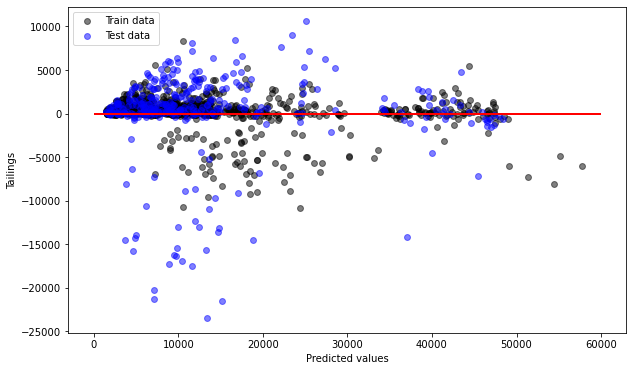

In [308]:
plt.figure(figsize=(10,6))

plt.scatter(forest_train_pred,forest_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(forest_test_pred,forest_test_pred - y_test,
          c = 'b', marker = 'o', s = 35, alpha = 0.5,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()

## Results

Result & Implication of the result

## Discussion

## Conclusion